# Analisis de predicción de regresión lineal
En este notebook encontrara el analisis de predicción del regresión lineal para ver la relación de precio de ventas y pronosticar el precio venta.
Analizaremos en un principio los datos del csv train

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('./data/train.csv', index_col= 0)
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Analizamos si la columna de SalePrice contiene NA

In [2]:
df_train['SalePrice'].isna().sum()

0

# Busqueda de correlación
Crearemos un hitmap para poder ver las correlaciones de los datos sin embargo solo seleccionamos la variables que deseamos ver

<AxesSubplot:>

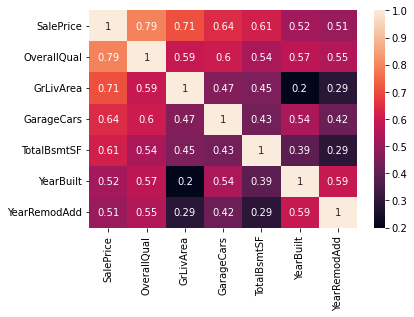

In [3]:
# Filtramos las columnas que solo necesitamos para hacer la variable
df_train_clean = df_train.loc[:,["SalePrice","OverallQual","GrLivArea","GarageCars"
                        ,"TotalBsmtSF","YearBuilt","YearRemodAdd"]]
sns.heatmap(df_train_clean.corr().abs(), annot= True)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

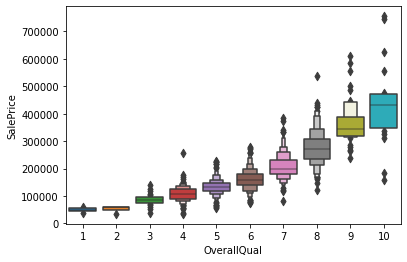

In [4]:
sns.boxenplot(x = 'OverallQual' ,y = 'SalePrice', data= df_train_clean)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

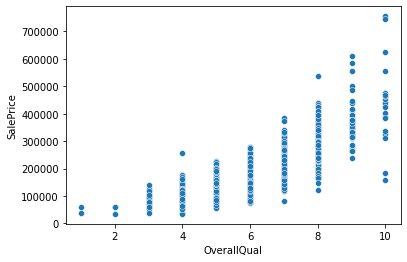

In [5]:
sns.scatterplot(x = 'OverallQual' ,y = 'SalePrice',data= df_train_clean)

# Entrenar los datos

Modelo para entrar los datos, utilizaremos la regresion lineal

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df_train_clean.loc[:,["OverallQual","GrLivArea","GarageCars"
                        ,"TotalBsmtSF","YearBuilt","YearRemodAdd"]]
y = df_train_clean.loc[:,["SalePrice"]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
lm.fit(X_train, y_train)
lm.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'YearBuilt', 'YearRemodAdd'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([[19436.90877887,    43.67490507, 16735.52372284,    23.40676256,
           219.67814787,   306.03756758]]),
 'rank_': 6,
 'singular_': array([1.84860443e+04, 1.10419453e+04, 9.68833583e+02, 4.61514281e+02,
        2.73843489e+01, 1.69098859e+01]),
 'intercept_': array([-1099624.78138854])}

In [8]:
prediccion = lm.predict(X_test)
df_prediccion = pd.DataFrame(prediccion)
df_prediccion.reset_index(drop = True, inplace = True) 
y_test.reset_index(drop = True, inplace = True)
df_unido = y_test.join(df_prediccion)

df_unido.columns = ['SalePrice', 'Predic']
df_unido

,SalePrice,Predic
0,154500,149386.207296
1,325000,286684.405177
2,115000,119615.676742
3,159000,171129.761054
4,315500,289603.748817
...,...,...
477,135000,111365.248440
478,119000,108313.841750
479,215000,225432.551723
480,133500,108965.237919


<AxesSubplot:xlabel='Predic', ylabel='SalePrice'>

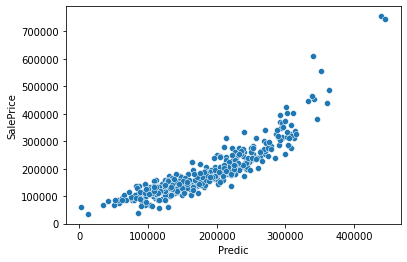

In [9]:
sns.scatterplot(x = 'Predic', y = 'SalePrice', data = df_unido)

## Limpiar datos
Detectaremos que columnas se encuentran vacios o con NA, esto para tener un dataset consistente y no tener datos erroneos al momento de crear nuestro modelo de predicción

In [10]:
X.isna().sum()

NameError: name 'X' is not defined

In [ ]:
X['GarageCars'].fillna(0, inplace = True) # Remplazar los NA en 0
X['TotalBsmtSF'].fillna( X['TotalBsmtSF'].mean() , inplace = True) # Remplazar los NA en media
X.isna().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [ ]:
Dtpredicciones = pd.DataFrame(predicciones) #transforma los datos predicciones a un DataFrame
id = df.loc[:,['Id']] #Extraer el ID del datafram principal

Dtpredicciones.reset_index(drop = True, inplace = True)
id.reset_index(drop = True, inplace = True)

# Uniendo los datos
df_entrega = id.join(Dtpredicciones)
df_entrega.columns = ['id', 'SalePrice']

df_entrega.head(5)

NameError: name 'predicciones' is not defined